In [2]:
#lab4
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

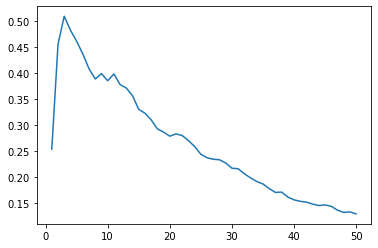

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston['data'],
boston['target'], random_state=0)
from sklearn.neighbors import KNeighborsRegressor
K_max = 50
import numpy as np
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(K_max)+1,results)

In [5]:
help(KNeighborsRegressor.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting for the estimator.
    
    y : array-like of shape (n

In [6]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=1)
cross_val_score(knn, X_train, y_train)

array([0.41743153, 0.17741167, 0.01938625, 0.427455  , 0.25685911])

In [7]:
from sklearn.utils import shuffle
X, y = shuffle(boston.data, boston.target, random_state=0)
print(cross_val_score(knn, X, y))

[0.27367598 0.27668466 0.48155521 0.45730902 0.67114389]


In [8]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.2540875231617269

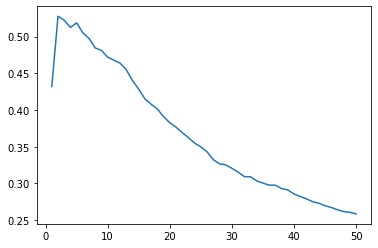

In [9]:
K_max = 50 # maximal number of nearest neighbours to consider
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    results[k] = np.mean(cross_val_score(knn, X, y))
plt.plot(np.arange(K_max)+1,results)

In [10]:
#exercise1
"""
You want ot take hte average of the scores at the current value, it would be useful for removing any outliers and getitng the genral shape of the data
"""

'\nYou want ot take hte average of the scores at the current value, it would be useful for removing any outliers and getitng the genral shape of the data\n'

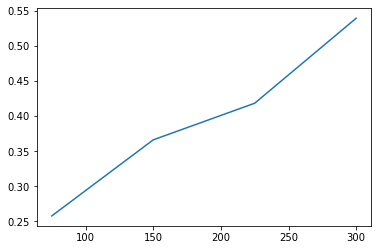

In [19]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes = np.array([75,150,225,300]) # sizes of training sets
# that we will try
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston.data,
    boston.target, train_size=train_sizes[k], random_state=0)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes,results)
#exercise 3
#10,50,75,500 almost two distinct lines, very sharp increase, line slows down but still with fast growth
#22,45,79,505 slow growth, followed by a much faster growth rate
#22,45,480,505very sharp initial growth, very rapid growth after
#100,200,300,400 close to an n shape
#75,150,225,300 fast, slow, fast